In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from wrangle import wrangle_data
from prepare import prepare_zillow_mvp
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = prepare_zillow_mvp()

In [80]:
model_1_data = df.drop(columns='more_than_two_bath')
model_2_data = df[['more_than_two_bath','taxvaluedollarcnt']]
model_3_data = df[['calculatedfinishedsquarefeet', 'more_than_two_bath', 'taxvaluedollarcnt']]

#  Model 1 Data
---
Features: bathroomcnt_scaled, bedroomcnt_scaled, calculatedfinishedsquarefeet_scaled 

In [86]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(model_1_data, 'taxvaluedollarcnt', modeling=True)

In [87]:
X_train

,bathroomcnt_scaled,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled
1711167,0.047619,0.166667,0.001309
2312067,0.063492,0.222222,0.002381
1020698,0.047619,0.111111,0.001028
2089824,0.047619,0.111111,0.001274
2218083,0.079365,0.166667,0.001858
...,...,...,...
1209,0.047619,0.166667,0.002031
1769202,0.047619,0.166667,0.001525
1453262,0.015873,0.111111,0.001038
967351,0.095238,0.166667,0.003761


In [88]:
df_model_evals = pd.DataFrame()

df_model_evals['y'] = y_train
df_model_evals['baseline_yhat'] = y_train.mean()

rmse_poly = sqrt(mean_squared_error(df_model_evals.y, df_model_evals.baseline_yhat))
rsquared_poly = explained_variance_score(y_train, df_model_evals.baseline_yhat)

print("Baseline Model")
print('-' * 24)
print(f"Basline Model RMSE: {rmse_poly:.2f}")
print(f"Basline R^2: {rsquared_poly:.2%}")

Baseline Model
------------------------
Basline Model RMSE: 672494.82
Basline R^2: 0.00%


In [89]:
df_model_evals.head()

,y,baseline_yhat
1711167,396962.0,460756.703083
2312067,630000.0,460756.703083
1020698,177856.0,460756.703083
2089824,524893.0,460756.703083
2218083,96286.0,460756.703083


In [91]:
# Create a polynomial linear regression
poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

df_model_evals['poly_1_yhat'] = lm_poly.predict(X_train_poly)

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=3")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=3
------------------------
Polynomial Model RMSE: 490288.02
Polynomial R^2: 46.85%


In [92]:
df_model_evals.head()

,y,baseline_yhat,poly_1_yhat
1711167,396962.0,460756.703083,263984.028220
2312067,630000.0,460756.703083,467517.903765
1020698,177856.0,460756.703083,251231.178129
2089824,524893.0,460756.703083,321888.391171
2218083,96286.0,460756.703083,441210.512722


In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
yhat_linear_regression = lm.predict(X_train)

In [64]:
residuals = yhat_linear_regression - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_linear_regression))
rsquared_poly = explained_variance_score(y_train, yhat_linear_regression)

print("Train Set\nLinear Regression")
print('-' * 24)
print(f"Linear Regression Model RMSE: {rmse_poly:.2f}")
print(f"Linear Regression R^2: {rsquared_poly:.2%}")

Train Set
Linear Regression
------------------------
Linear Regression Model RMSE: 561272.34
Linear Regression R^2: 30.34%


#  Model 2 Data
---
Features:

In [67]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(model_2_data, 'taxvaluedollarcnt', modeling=True)

In [68]:
# Create a polynomial linear regression
poly = PolynomialFeatures()

X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

In [76]:
lm_poly = LinearRegression(2)
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=2")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=2
------------------------
Polynomial Model RMSE: 639786.30
Polynomial R^2: 9.49%


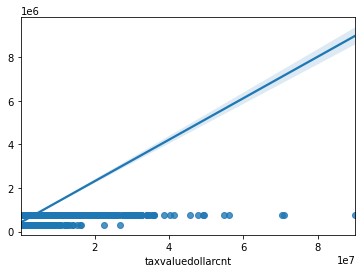

In [77]:
sns.regplot(y_train, yhat_poly_train);

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)

yhat_linear_regression = lm.predict(X_train)

residuals = yhat_linear_regression - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_linear_regression))
rsquared_poly = explained_variance_score(y_train, yhat_linear_regression)

print("Train Set\nLinear Regression")
print('-' * 24)
print(f"Linear Regression Model RMSE: {rmse_poly:.2f}")
print(f"Linear Regression R^2: {rsquared_poly:.2%}")

Train Set
Linear Regression
------------------------
Linear Regression Model RMSE: 639786.30
Linear Regression R^2: 9.49%


In [81]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(model_3_data, 'taxvaluedollarcnt', modeling=True)

In [82]:
X_train.head()

,calculatedfinishedsquarefeet_scaled,more_than_two_bath_scaled
1711167,0.001309,0.0
2312067,0.002381,1.0
1020698,0.001028,0.0
2089824,0.001274,0.0
2218083,0.001858,1.0


In [84]:
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression(3)
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=3")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=3
------------------------
Polynomial Model RMSE: 505011.71
Polynomial R^2: 43.61%


In [85]:
# from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# logreg = LinearRegression()
# logreg.fit(X_train, y_train)

# yhat_log_train = logreg.predict(X_train_poly)
# train_log_residuals = yhat_log_train - y_train

# rmse_poly = sqrt(mean_squared_error(y_train, yhat))
# rsquared_poly = explained_variance_score(y_train, yhat)

# print("Train Set\nPolynomial : degree=3")
# print('-' * 24)
# print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
# print(f"Polynomial R^2: {rsquared_poly:.2%}")

##  Validate

yhat_poly_train = lm_poly.predict(X_)